<a href="https://colab.research.google.com/github/Zahra-Mhdi/Deep-Learning-Exercises/blob/main/Session_3_Exercise_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercise 1 : Try sigmoid

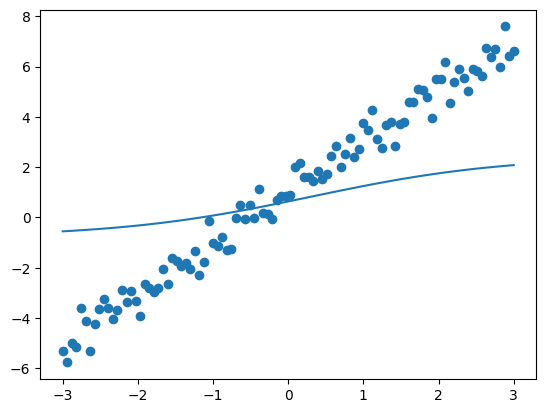

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class ShallowNN(nn.Module):
    def __init__(self):
        super(ShallowNN, self).__init__()
        self.hidden = nn.Linear(1, 10)
        self.output = nn.Linear(10, 1)

    def forward(self, x):
        x = torch.sigmoid(self.hidden(x))
        x = self.output(x)
        return x

model = ShallowNN().to(device)
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

x = torch.linspace(-3, 3, 100).unsqueeze(1).to(device)
y_true = 2 * x + 1 + 0.5 * torch.randn(x.size()).to(device)

epochs = 20
for epoch in range(epochs):
    y_pred = model(x)
    loss = loss_fn(y_pred, y_true)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

with torch.no_grad():
    y_pred = model(x)

plt.scatter(x.cpu(), y_true.cpu())
plt.plot(x.cpu(), y_pred.cpu())
plt.show()
